# Realizando leitura do txt e criando grafo

Primeiramente, temos que fazer a leitura do txt, identificando as dimensões do tabuleiro na primeira linha e posteriormente lendo cada asterístico como um espaço em branco no tabuleiro (posiçoes que pode andar), traço representando obstáculos, jogo da velha a posição inicial e cifrão a posição objetivo. Além disso, precisamos criar um grafo guardando as posições permitidas como vértices. Com o intuito de não consumir tanta memória (matriz muito esparsa) iremos utilizar a representação de **lista de adjacência**, em que cada vértice deve ter uma lista com seus vizinhos/adjacentes

In [446]:
#Abrindo arquivo para leitura -> passar o caminho correto para o txt (aqui deixei na mesma pasta)
f = open("labirinto3.txt",'r')
print(f)

<_io.TextIOWrapper name='labirinto3.txt' mode='r' encoding='UTF-8'>


In [447]:
#Lendo primeira linha para obter dimensoes
line = f.readline()
#Separando as strings de dimensão
dimensions = line.split()
#Transformando em inteiros
rows = int(dimensions[0])
cols = int(dimensions[1])
print("Numero de linhas: ", rows, "\nNumero de colunas: ", cols)

Numero de linhas:  30 
Numero de colunas:  30


In [448]:
#Lendo o resto de linhas
maze = f.readlines()
#Printando o labirinto como está no txt
for l in maze:
    print(l)

******************************

*-----*-------*--------*-----*

*-----*-------*--------*-----*

*-----****----*-----****-----*

*--------*----*-----*--------*

*********#********************

*--------*--*----*--*--------*

*--*******--*----*--*******--*

*--*--------*----*--------*--*

*************----*************

*--*----------------------*--*

*--************************--*

*-----*-------*--------*-----*

*-----*-------*--------*-----*

******************************

*-----*------------*---------*

*-----*------------*---------*

*-----***----------*****-----*

*-------*--------------*-----*

*-------**********************

*--------------*-------------*

*---***--------*-------------*

*-----*--------*-------------*

***************$**-----------*

*-----*----------*-----------*

*-----*----------*************

*-----*----------------------*

*-----*********--------------*

*-----*-------*--------------*

******************************



Text(0.5, 1.0, 'Labirinto')

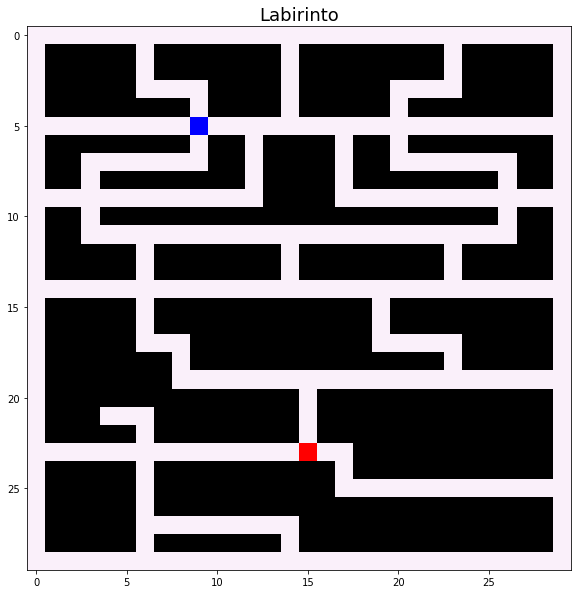

In [449]:
#Iremos transformar a matriz de caracteres em uma imagem do labarinto para uma melhor visualização
import numpy as np
from matplotlib import pyplot as plt

#Criando imagem de mesma dimensão do labirinto
img_maze = np.zeros((rows, cols,3), np.uint8)

#Pintando os pixels de posição respectiva a matriz de caracteres
for i in range(0, rows):
    for j in range(0, cols):
        if(maze[i][j] == '-'): #Obstáculos em preto
            img_maze[i][j] = [0,0,0]
        elif(maze[i][j] == '*'): #Posições permitidas em branco
            img_maze[i][j] = [250,240,250]
        elif(maze[i][j] == '#'): #Posição inicial em azul
            img_maze[i][j] = [0,0,255]
        elif(maze[i][j] == '$'): #Posição final em vermelho
            img_maze[i][j] = [255,0,0]
#Plotando a imagem
f, ax = plt.subplots(figsize=(20, 10))
ax.imshow(img_maze)
ax.set_title('Labirinto', fontsize=18)
#ax.axis('off')


In [450]:
#Dicionário que guardará o grafo
graph = {}
#Guardará a posicao inicial (#)
ini_position = 0
#Guardará a saída do grafo ($)
fin_position = 0
#Vamos percorrer a matriz de caracteres
for i in range(0, rows):
    for j in range(0, cols):
        #Se é - nem considero como vertice (nao pode passar)
        if(maze[i][j] != '-'):
            
            #Lista que guarda os vertices adjacentes(que possui conexao) ao em analise atual
            adj_list = []
            
            #Condicao para guardar a posicao inicial
            if(maze[i][j] =='#'):
                ini_position = (i,j)
                
            #Condicao para guardar a posicao de saida do labirinto
            elif(maze[i][j] == '$'):
                fin_position = (i,j)
            
            #Checando as posicoes adjacentes ao vertice atual
            for aux in [(i,j+1),(i+1,j),(i,j-1),(i-1,j)]: #A forma como ordena influencia bastante os algoritmos !!
                #Checo se e uma posicao valida (se existe a posicao)
                if((aux[0] >= 0) and (aux[0] < rows) and (aux[1] >= 0) and (aux[1] < cols)):
                    #Se essa posicao adjacente tiver conexao 
                    if(maze[aux[0]][aux[1]] != '-'):
                        adj_list.append((aux[0],aux[1]))
            graph[(i,j)] = adj_list

In [451]:
#Printando a posicao inicial e a saida do labirinto
print("Posicao de inicio: ", ini_position)
print("Posicao de saida: ", fin_position)

Posicao de inicio:  (5, 9)
Posicao de saida:  (23, 15)


In [452]:
#Printando o grafo
for vertix in graph:
    print(vertix, ": ", graph[vertix])

(0, 0) :  [(0, 1), (1, 0)]
(0, 1) :  [(0, 2), (0, 0)]
(0, 2) :  [(0, 3), (0, 1)]
(0, 3) :  [(0, 4), (0, 2)]
(0, 4) :  [(0, 5), (0, 3)]
(0, 5) :  [(0, 6), (0, 4)]
(0, 6) :  [(0, 7), (1, 6), (0, 5)]
(0, 7) :  [(0, 8), (0, 6)]
(0, 8) :  [(0, 9), (0, 7)]
(0, 9) :  [(0, 10), (0, 8)]
(0, 10) :  [(0, 11), (0, 9)]
(0, 11) :  [(0, 12), (0, 10)]
(0, 12) :  [(0, 13), (0, 11)]
(0, 13) :  [(0, 14), (0, 12)]
(0, 14) :  [(0, 15), (1, 14), (0, 13)]
(0, 15) :  [(0, 16), (0, 14)]
(0, 16) :  [(0, 17), (0, 15)]
(0, 17) :  [(0, 18), (0, 16)]
(0, 18) :  [(0, 19), (0, 17)]
(0, 19) :  [(0, 20), (0, 18)]
(0, 20) :  [(0, 21), (0, 19)]
(0, 21) :  [(0, 22), (0, 20)]
(0, 22) :  [(0, 23), (0, 21)]
(0, 23) :  [(0, 24), (1, 23), (0, 22)]
(0, 24) :  [(0, 25), (0, 23)]
(0, 25) :  [(0, 26), (0, 24)]
(0, 26) :  [(0, 27), (0, 25)]
(0, 27) :  [(0, 28), (0, 26)]
(0, 28) :  [(0, 29), (0, 27)]
(0, 29) :  [(1, 29), (0, 28)]
(1, 0) :  [(2, 0), (0, 0)]
(1, 6) :  [(2, 6), (0, 6)]
(1, 14) :  [(2, 14), (0, 14)]
(1, 23) :  [(2, 23),

In [453]:
print("Total de vértices: ",len(graph))

Total de vértices:  356


# Busca em profundidade

Iremos implementar agora um algoritmo que realiza uma busca em profundidade no grafo **(Depth_First_Search)**, guardando os vétices visitados com sua respectiva profundidade, uma lista com os vértices indicando o caminho da posição inicial a saída do labirinto na ordem de busca do DFS e depois a imagem com o caminho indicado

In [454]:
def DFS(graph, vertix, visited, cont, target, path):
    #Guarda o vértice visitado com a sua profundidade
    visited[vertix] = cont
    
    #Insere vertice na lista que guarda o caminho
    path.append(vertix)
    
    #Se o vertice final for encontrado para e retorna verdadeiro
    if(vertix == target):
        return True
    
    #Para cada vizinho do vertice atual 
    for neighboor in graph[vertix]:
        #Checa se ele já não foi visitado
        if neighboor not in visited:
            #Se nao, visita ele e retorna verdadeiro se o seu vizinho pode ser visitado
            if DFS(graph, neighboor, visited, cont+1, target, path):
                return True
    path.pop()
    return False
    

def Depth_First_Search(graph, v_ini, v_fin):
    #Dicionário com os vértices visitados e a profundidade de cada
    visited = {}
    #Deque que guardará o caminho exato entre o vertice inicial e final
    path = []
    #Contador inicializado com 1
    cont = 1
    #Chama a funcao que realmente vai realizar a busca em profundidade
    test = DFS(graph, v_ini, visited, cont, v_fin, path)
    if not test:
        print("Nao existe um caminho valido entre a posicao inicial e a saida")
    return visited, path
    

In [455]:
#Aplicando o DFS no grafo gerado, tomando tempo e printando informações
import timeit
start_time = timeit.default_timer()
DFS_visited, DFS_path = Depth_First_Search(graph, ini_position, fin_position)
fim = timeit.default_timer() - start_time

print("Vertices visitados com profundidade: \n" ,DFS_visited)

print("\nTotal de vertices visitados: ",len(DFS_visited),"\n")

print("Caminho entre posicao inicial e saida:\n",DFS_path)

print("\nTamanho do caminho: ", len(DFS_path))

print("\nTempo de execução: ", fim)

Vertices visitados com profundidade: 
 {(5, 9): 1, (5, 10): 2, (5, 11): 3, (5, 12): 4, (5, 13): 5, (5, 14): 6, (5, 15): 7, (5, 16): 8, (5, 17): 9, (5, 18): 10, (5, 19): 11, (5, 20): 12, (5, 21): 13, (5, 22): 14, (5, 23): 15, (5, 24): 16, (5, 25): 17, (5, 26): 18, (5, 27): 19, (5, 28): 20, (5, 29): 21, (6, 29): 22, (7, 29): 23, (8, 29): 24, (9, 29): 25, (10, 29): 26, (11, 29): 27, (12, 29): 28, (13, 29): 29, (14, 29): 30, (15, 29): 31, (16, 29): 32, (17, 29): 33, (18, 29): 34, (19, 29): 35, (20, 29): 36, (21, 29): 37, (22, 29): 38, (23, 29): 39, (24, 29): 40, (25, 29): 41, (26, 29): 42, (27, 29): 43, (28, 29): 44, (29, 29): 45, (29, 28): 46, (29, 27): 47, (29, 26): 48, (29, 25): 49, (29, 24): 50, (29, 23): 51, (29, 22): 52, (29, 21): 53, (29, 20): 54, (29, 19): 55, (29, 18): 56, (29, 17): 57, (29, 16): 58, (29, 15): 59, (29, 14): 60, (29, 13): 61, (29, 12): 62, (29, 11): 63, (29, 10): 64, (29, 9): 65, (29, 8): 66, (29, 7): 67, (29, 6): 68, (29, 5): 69, (29, 4): 70, (29, 3): 71, (29, 2):

Text(0.5, 1.0, 'Labirinto - Busca em Profundidade')

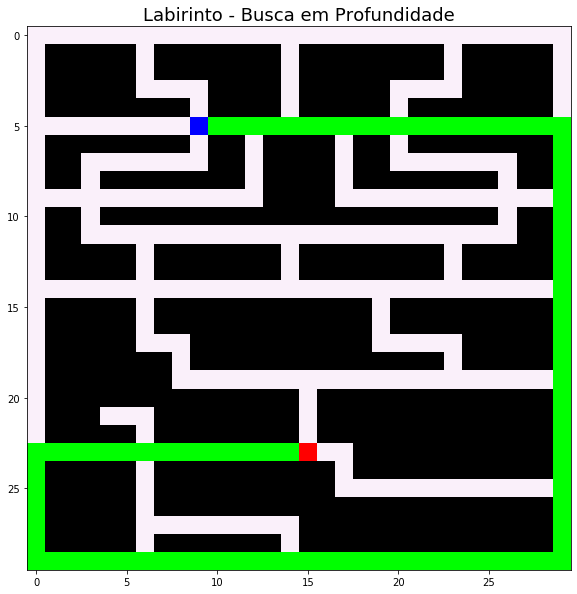

In [456]:
#Gerando imagem com o caminho gerado pelo DFS
img_DFS = np.copy(img_maze)
for v in DFS_path:
    img_DFS[v[0]][v[1]] = [0,255,0]

img_DFS[ini_position[0]][ini_position[1]] = [0,0,255]
img_DFS[fin_position[0]][fin_position[1]] = [255,0,0]
    
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.imshow(img_DFS)
ax1.set_title('Labirinto - Busca em Profundidade', fontsize=18)
#ax1.axis('off')

# Busca em largura

Iremos implementar agora um algoritmo que realiza uma busca em largura no grafo **(Breadth First Search)**, guardando os vétices visitados com sua respectiva profundidade informada, uma lista com os vértices indicicando o caminho da posição inicial a saída do labirinto na ordem de busca do BFS e depois a imagem com o caminho indicado

In [457]:
def Breadth_First_Search(graph, v_ini, v_fin):
    #Fila que guardará lista de caminhos com vértices a serem visitados
    queue = [[v_ini]]
    #Dicionário que guardará vértices visitados com sua profundidade
    visited = {}
    #Enquanto existir vé
    while queue:
        #Responsável por pegar a profundidade do vértice que será analisado
        depth = len(queue[0])
        # Pega o primeiro caminho na fila, removendo-o de tal
        path = queue.pop(0)

        # Pega o último vértice do caminho (vértice que será analisado)
        vertex = path[-1]
        
        # Checa se tal vértice não é o vértice final (saída do labirinto)
        if vertex == v_fin:
            #Retorna o caminho e os visitados com profundidade
            return path, visited
        #Checa se tal vértice já não foi visitado para não visitar novamente
        elif vertex not in visited:
            # Para cada vizinho do vértice atual em analise
            for neighbour in graph[vertex]:
                #Cria um novo caminho tomando o anterior e adicionando o vizinho no final
                new_path = list(path)
                #Enfilero o caminho
                new_path.append(neighbour)
                
                queue.append(new_path)

            # Marco o vértice analisado como visitado
            visited[vertex] = depth

In [458]:
#Aplicando o DFS no grafo gerado, tomando tempo e printando informações
start_time = timeit.default_timer()
BreadthFS_path, BreadthFD_visited = Breadth_First_Search(graph, ini_position, fin_position)
fim = timeit.default_timer() - start_time

print("Visitados com respectiva profundidade: \n", BreadthFD_visited)

print("\nTotal de vertices visitados: ",len(BreadthFD_visited),"\n")

print("\n\nCaminho gerado:\n",BreadthFS_path)

print("\nTamanho do caminho: ", len(BreadthFS_path))

print("\nTempo de execução: ", fim)

Visitados com respectiva profundidade: 
 {(5, 9): 1, (5, 10): 2, (6, 9): 2, (5, 8): 2, (4, 9): 2, (5, 11): 3, (7, 9): 3, (5, 7): 3, (3, 9): 3, (5, 12): 4, (7, 8): 4, (5, 6): 4, (3, 8): 4, (5, 13): 5, (6, 12): 5, (7, 7): 5, (5, 5): 5, (3, 7): 5, (5, 14): 6, (7, 12): 6, (7, 6): 6, (5, 4): 6, (3, 6): 6, (5, 15): 7, (4, 14): 7, (8, 12): 7, (7, 5): 7, (5, 3): 7, (2, 6): 7, (5, 16): 8, (3, 14): 8, (9, 12): 8, (7, 4): 8, (5, 2): 8, (1, 6): 8, (5, 17): 9, (2, 14): 9, (9, 11): 9, (7, 3): 9, (5, 1): 9, (0, 6): 9, (5, 18): 10, (6, 17): 10, (1, 14): 10, (9, 10): 10, (8, 3): 10, (5, 0): 10, (0, 7): 10, (0, 5): 10, (5, 19): 11, (7, 17): 11, (0, 14): 11, (9, 9): 11, (9, 3): 11, (6, 0): 11, (4, 0): 11, (0, 8): 11, (0, 4): 11, (5, 20): 12, (8, 17): 12, (0, 15): 12, (0, 13): 12, (9, 8): 12, (9, 4): 12, (10, 3): 12, (9, 2): 12, (7, 0): 12, (3, 0): 12, (0, 9): 12, (0, 3): 12, (5, 21): 13, (6, 20): 13, (4, 20): 13, (9, 17): 13, (0, 16): 13, (0, 12): 13, (9, 7): 13, (9, 5): 13, (11, 3): 13, (9, 1): 13, (8, 

Text(0.5, 1.0, 'Labirinto - Busca em Largura')

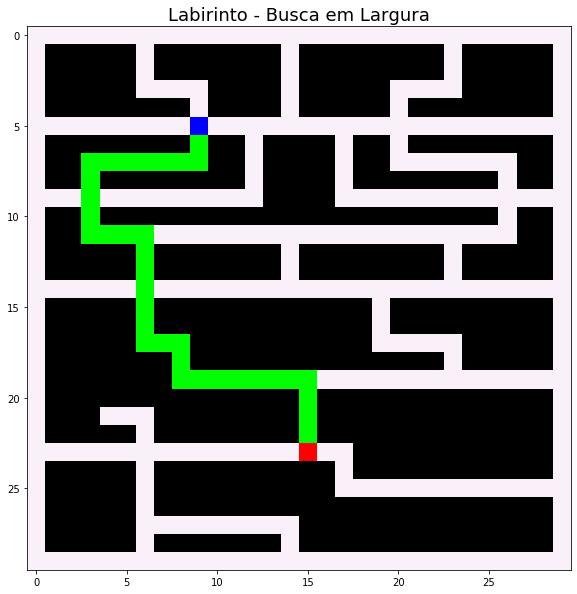

In [459]:
#Gerando imagem com o caminho da busca em largura
img_BreadthFS = np.copy(img_maze)
for v in BreadthFS_path:
    img_BreadthFS[v[0]][v[1]] = [0,255,0]

img_BreadthFS[ini_position[0]][ini_position[1]] = [0,0,255]
img_BreadthFS[fin_position[0]][fin_position[1]] = [255,0,0]
    
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.imshow(img_BreadthFS)
ax1.set_title('Labirinto - Busca em Largura', fontsize=18)
#ax1.axis('off')

# Gerando grafos com peso

Para rodar os algoritmos de busca informada precisamos primeiramente gerar um grafo com pesos. Dessa forma iremos criar uma função para calcular os pesos se baseando na distância em módulo de cada vértice ao vértice final (saída do labirinto)

In [460]:
#Função que calcula a distância em módulo de um ponto a outro
def distance_calc(target, pos):
    dist_x = abs(target[0] - pos[0])
    dist_y = abs(target[1] - pos[1])
    mod = ((dist_x**2) + (dist_y**2))**(1/2)
    return mod


In [461]:
def manhattan_dist(target, pos):
    dist = abs(target[0] - pos[0]) + abs(target[1] - pos[1])
    return dist

In [462]:
#Classe utilizada para montar grafo com pesos (guardará os verticés adjacentes e o peso desse respectivo ao vértice final)
class vertex_weight:
    def __init__(self, vertex, weigth):
        self.vertex = vertex
        self.weigth = weigth
    
    def __str__(self):
        s = "adj: (" + str(self.vertex[0]) + "," + str(self.vertex[1]) + ") w: " + str(self.weigth)
        return s

In [463]:
#Dicionário que guardará o grafo com os pesos para o Best-First
weighted_graph_best = {}

#Para cada vértice do grafo
for source_vertex in graph:
    #Lista auxiliar para armazenar os vértices vizinhos com os pesos da aresta
    aux = []
    #Para cada vértice adjacente do atual
    for dst_vertex in graph[source_vertex]:
        #Calcula a distância do adjacente ao vértice final para ser o peso da ligação
        dist = distance_calc(fin_position, dst_vertex)
        #Adiciona na lista auxiliar
        aux.append(vertex_weight(dst_vertex,dist))
    #Adiciona a lista de vértices adjacentes no dicionário com o respectivo vértice
    weighted_graph_best[source_vertex] = aux
        

In [464]:
#Printando o grafo com pesos
for vertix in weighted_graph_best:
    print("Vertix ", vertix, ": ") 
    for adj in weighted_graph_best[vertix]:
        print(adj)

Vertix  (0, 0) : 
adj: (0,1) w: 26.92582403567252
adj: (1,0) w: 26.627053911388696
Vertix  (0, 1) : 
adj: (0,2) w: 26.419689627245813
adj: (0,0) w: 27.459060435491963
Vertix  (0, 2) : 
adj: (0,3) w: 25.942243542145693
adj: (0,1) w: 26.92582403567252
Vertix  (0, 3) : 
adj: (0,4) w: 25.495097567963924
adj: (0,2) w: 26.419689627245813
Vertix  (0, 4) : 
adj: (0,5) w: 25.079872407968907
adj: (0,3) w: 25.942243542145693
Vertix  (0, 5) : 
adj: (0,6) w: 24.698178070456937
adj: (0,4) w: 25.495097567963924
Vertix  (0, 6) : 
adj: (0,7) w: 24.351591323771842
adj: (1,6) w: 23.769728648009426
adj: (0,5) w: 25.079872407968907
Vertix  (0, 7) : 
adj: (0,8) w: 24.041630560342615
adj: (0,6) w: 24.698178070456937
Vertix  (0, 8) : 
adj: (0,9) w: 23.769728648009426
adj: (0,7) w: 24.351591323771842
Vertix  (0, 9) : 
adj: (0,10) w: 23.53720459187964
adj: (0,8) w: 24.041630560342615
Vertix  (0, 10) : 
adj: (0,11) w: 23.345235059857504
adj: (0,9) w: 23.769728648009426
Vertix  (0, 11) : 
adj: (0,12) w: 23.194827

# Busca Best-First Search

Iremos implementar agora um algoritmo que realiza uma busca informada, a **Best-First Search** que utiliza dos pesos para determinar o melhor caminho a se seguir, sendo semelhante a busca em largura, porém agora manteremos a fila utilizada ordenada do menor peso para o maior com o intuito de explorar os vizinhos que possui uma ligação de peso menor

In [465]:
#Função que irá partir do vértice final encontrando seus antecessores e assim formando o caminho e deixando ordenado
def backtrace(parent, start, end):
    path = [end]
    cont = 0
    while path[-1] != start:
        path.append(parent[path[-1]])
        cont = cont + 1
    path.reverse()
    return path

def Best_First_Search(graph, v_ini, v_fin):
    #Fila que guardará os vértices a serem explorados (explorar os vizinhos) de forma ordenada (menor pesos no início da fila)
    priority_queue = []
    #Guarda os vértices visitados com respectiva profundidade
    visited = {}
    #Contador de profundidade para os vértices visitados
    cont = 0
    #Insiro o primeiro vértice como visitado já
    visited[v_ini] = cont
    #Insiro o primeiro vértice na fila   
    priority_queue.append(vertex_weight(v_ini, distance_calc(v_fin,v_ini)))
    #Dicionário que guarda um vértice com seu antecessor na ordem de exploração
    parent = {}
    #Enquanto existe vértices a na fila
    while priority_queue:
        #Pego o vértice no início da fila removendo-o de lá
        aux = priority_queue.pop(0)
        vertex = aux.vertex
        #Se ele for o vértice final
        if vertex == v_fin:
            #Retorno os visitados e faço a construção do caminho com a backtrace
            return backtrace(parent, v_ini, v_fin), visited
        #Se não
        else:
            #Incremento o contador de profundidade
            cont = cont + 1
            #Para cada vizinho do vértice atual
            for neighbor in graph[vertex]:
                #Se o vizinho já não foi visitado
                if neighbor.vertex not in visited:
                    #Adiciona como visitado e sua profundidade
                    visited[neighbor.vertex] = cont
                    #Adiciono o vizinho na filaprint("\nTempo de execução: ", fim) para depois explorá-lo
                    priority_queue.append(neighbor)
                    #Ordeno a fila de acordo com o peso da ligação
                    priority_queue.sort(key=lambda x: x.weigth)
                    #Adiciono o vizinho com seu "pai" que é o vértice atual em análise
                    parent[neighbor.vertex] = vertex 

In [466]:
#Aplicando o Best First Search no grafo com pesos e printando as informações
start_time = timeit.default_timer()
BestFS_path, BestFS_visited = Best_First_Search(weighted_graph_best, ini_position, fin_position)
fim = timeit.default_timer() - start_time

print("Visitados com respectiva profundidade: \n", BestFS_visited)

print("\nTotal de vertices visitados: ",len(BestFS_visited),"\n")

print("\n\nCaminho gerado:\n",BestFS_path)

print("\nTamanho do caminho: ", len(BestFS_path))

print("\nTempo de execução: ", fim)

Visitados com respectiva profundidade: 
 {(5, 9): 0, (5, 10): 1, (6, 9): 1, (5, 8): 1, (4, 9): 1, (7, 9): 2, (7, 8): 3, (7, 7): 4, (7, 6): 5, (7, 5): 6, (5, 11): 7, (5, 12): 8, (5, 13): 9, (6, 12): 9, (7, 12): 10, (8, 12): 11, (9, 12): 12, (9, 11): 13, (9, 10): 14, (9, 9): 15, (9, 8): 16, (9, 7): 17, (9, 6): 18, (9, 5): 19, (9, 4): 20, (9, 3): 21, (5, 14): 22, (5, 15): 23, (4, 14): 23, (5, 16): 24, (5, 17): 25, (5, 18): 26, (6, 17): 26, (7, 17): 27, (8, 17): 28, (9, 17): 29, (9, 18): 30, (9, 19): 31, (9, 20): 32, (9, 21): 33, (9, 22): 34, (9, 23): 35, (9, 24): 36, (9, 25): 37, (9, 26): 38, (9, 27): 39, (10, 26): 39, (8, 26): 39, (11, 26): 40, (11, 25): 41, (11, 24): 42, (11, 23): 43, (12, 23): 44, (11, 22): 44, (13, 23): 45, (14, 23): 46, (14, 24): 47, (14, 22): 47, (14, 21): 48, (14, 20): 49, (14, 19): 50, (15, 19): 51, (14, 18): 51, (16, 19): 52, (17, 19): 53, (17, 20): 54, (17, 21): 55, (17, 22): 56, (17, 23): 57, (14, 17): 58, (14, 16): 59, (14, 15): 60, (14, 14): 61, (14, 13): 62,

Text(0.5, 1.0, 'Labirinto - Busca Best First')

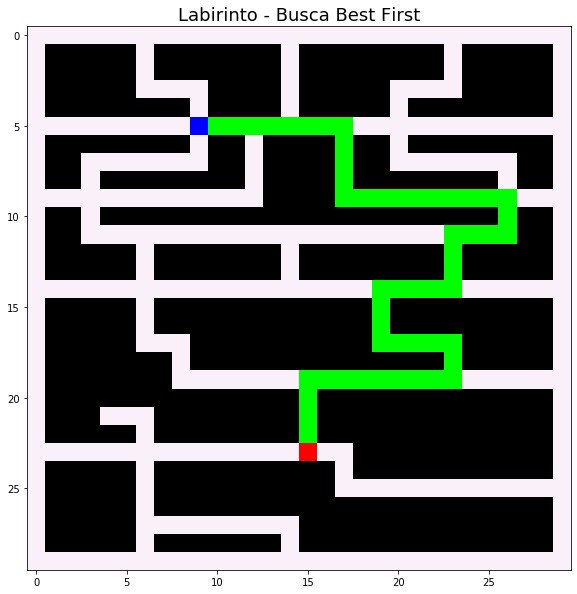

In [467]:
#Gerando imagem do labirinto com o caminho
img_BestFS = np.copy(img_maze)
for v in BestFS_path:
    img_BestFS[v[0]][v[1]] = [0,255,0]

img_BestFS[ini_position[0]][ini_position[1]] = [0,0,255]
img_BestFS[fin_position[0]][fin_position[1]] = [255,0,0]
    
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.imshow(img_BestFS)
ax1.set_title('Labirinto - Busca Best First', fontsize=18)
#ax1.axis('off')

# Busca A*

Iremos implementar agora um algoritmo que realiza uma busca informada, a A* que utiliza da distância da posição de origem e da posição de destino para determinar o melhor caminho a se seguir

In [468]:
class vertex_weight_star:
    def __init__(self, vertex, weigth_h, weigth_g):
        self.vertex = vertex
        self.weigth_h = weigth_h
        self.weigth_g = weigth_g
        self.weigth_f = weigth_h + weigth_g
    
    def __str__(self):
        s = "adj: (" + str(self.vertex[0]) + "," + str(self.vertex[1]) + ") h: " + str(self.weigth_h) + " g: " + str(self.weigth_g)+ " f: " + str(self.weigth_f)
        return s

In [469]:
#Dicionário que guardará o grafo com os pesos
double_weighted_graph = {}

#Para cada vértice do grafo
for source_vertex in graph:
    #Lista auxiliar para armazenar os vértices vizinhos com os pesos da aresta
    aux = []
    #Para cada vértice adjacente do atual
    for dst_vertex in graph[source_vertex]:
        #Calcula a distância do adjacente ao vértice final para ser o peso da ligação
        dist = distance_calc(fin_position, dst_vertex)
        #Adiciona na lista auxiliargraph
        aux.append(vertex_weight_star(dst_vertex,dist,100))
    #Adiciona a lista de vértices adjacentes no dicionário com o respectivo vértice
    double_weighted_graph[source_vertex] = aux

In [470]:
#Função que irá partir do vértice final encontrando seus antecessores e assim formando o caminho e deixando ordenado
def backtrace(parent, start, end):
    path = [end]
    cont = 0
    while path[-1] != start:
        path.append(parent[path[-1]])
        cont = cont + 1
    path.reverse()
    return path

def A_Star(graph, v_ini, v_fin):
    #Fila que guardará os vértices a serem explorados (explorar os vizinhos) de forma ordenada (menor pesos no início da fila)
    fila_prioridade = []
    #Guarda os vértices visitados com respectiva profundidade
    visited = {}
    #Contador de profundidade para os vértices visitados
    cont = 0
    #Insiro o primeiro vértice como visitado já
    visited[v_ini] = cont
    #Insiro o primeiro vértice na fila   
    fila_prioridade.append(vertex_weight_star(v_ini, distance_calc(v_fin,v_ini),0))
    #Dicionário que guarda um vértice com seu antecessor na ordem de exploração
    parent = {}
    #Enquanto existe vértices a na fila
    while fila_prioridade:
        #Pego o vértice no início da fila removendo-o de lá
        aux = fila_prioridade.pop(0)
        vertex = aux.vertex
        #Se ele for o vértice final
        if vertex == v_fin:
            #Retorno os visitados e faço a construção do caminho com a backtrace
            return backtrace(parent, v_ini, v_fin), visited
        #Se não
        else:
            #Incremento o contador de profundidade
            cont = cont + 1
            #Para cada vizinho do vértice atual
            for neighbor in graph[vertex]:
                #Se o vizinho já não foi visitado
                if neighbor.vertex not in visited:
                    #Adiciona como visitado e sua profundidade
                    visited[neighbor.vertex] = cont
                    #É atribuido o valor heurístico g(n) ao novo nó, somando a distância deste ao seu pai com g(n-1) de seu pai
                    neighbor.weigth_g = distance_calc(neighbor.vertex,vertex) + aux.weigth_g
                    #É atualizado o valor heurístico f(n), sendo f(n) = g(n) + h(n)
                    neighbor.weigth_f = neighbor.weigth_g + neighbor.weigth_h
                    #Adiciono o vizinho na filaprint("\nTempo de execução: ", fim) para depois explorá-lo
                    fila_prioridade.append(neighbor)
                    #Ordeno a fila de acordo com o peso da ligação
                    fila_prioridade.sort(key=lambda x: x.weigth_f)
                    #Adiciono o vizinho com seu "pai" que é o vértice atual em análise
                    parent[neighbor.vertex] = vertex


In [471]:
import timeit
#Aplicando o A Star Search no grafo com pesos e printando as informações
start_time = timeit.default_timer()
AStar_path, AStar_visited = A_Star(double_weighted_graph, ini_position, fin_position)
fim = timeit.default_timer() - start_time

print("Visitados com respectiva profundidade: \n", AStar_visited)

print("\nTotal de vertices visitados: ",len(AStar_visited),"\n")

print("\n\nCaminho gerado:\n",AStar_path)

print("\nTamanho do caminho: ", len(AStar_path))

print("\nTempo de execução: ", fim)

Visitados com respectiva profundidade: 
 {(5, 9): 0, (5, 10): 1, (6, 9): 1, (5, 8): 1, (4, 9): 1, (7, 9): 2, (7, 8): 3, (5, 11): 4, (5, 7): 5, (5, 12): 6, (7, 7): 7, (3, 9): 8, (5, 13): 9, (6, 12): 9, (7, 12): 10, (8, 12): 11, (9, 12): 12, (9, 11): 13, (5, 6): 14, (7, 6): 15, (5, 14): 16, (9, 10): 17, (3, 8): 18, (5, 15): 19, (4, 14): 19, (5, 5): 20, (7, 5): 21, (9, 9): 22, (5, 16): 23, (3, 7): 24, (5, 4): 25, (7, 4): 26, (3, 14): 27, (5, 17): 28, (9, 8): 29, (3, 6): 30, (5, 3): 31, (5, 18): 32, (6, 17): 32, (7, 17): 33, (8, 17): 34, (9, 17): 35, (9, 18): 36, (7, 3): 37, (9, 7): 38, (2, 6): 39, (2, 14): 40, (5, 19): 41, (9, 19): 42, (5, 2): 43, (8, 3): 44, (9, 6): 45, (9, 3): 46, (5, 20): 47, (9, 4): 48, (10, 3): 48, (9, 2): 48, (9, 20): 49, (11, 3): 50, (9, 5): 51, (1, 6): 52, (11, 4): 53, (1, 14): 54, (5, 1): 55, (11, 5): 57, (11, 6): 58, (5, 21): 60, (6, 20): 60, (4, 20): 60, (7, 20): 61, (7, 21): 62, (9, 21): 63, (11, 7): 64, (12, 6): 64, (9, 1): 65, (13, 6): 66, (11, 8): 67, (14, 

Text(0.5, 1.0, 'Labirinto - Busca A Star')

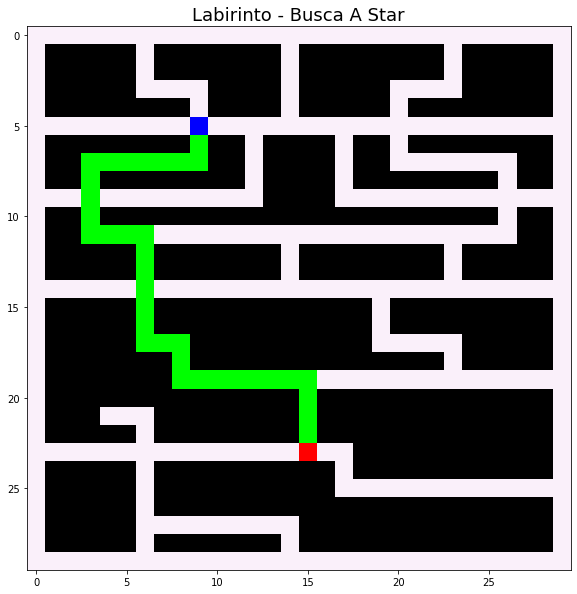

In [472]:
#Gerando imagem do labirinto com o caminho
img_AStar = np.copy(img_maze)
for v in AStar_path:
    img_AStar[v[0]][v[1]] = [0,255,0]

img_AStar[ini_position[0]][ini_position[1]] = [0,0,255]
img_AStar[fin_position[0]][fin_position[1]] = [255,0,0]
    
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.imshow(img_AStar)
ax1.set_title('Labirinto - Busca A Star', fontsize=18)
#ax1.axis('off')

# Busca Hill Climbing

Iremos implementar agora um algoritmo que realiza uma busca informada, **Hill Climbing Simples** que não possui a intenção de encontrar a solução ótima, mas sim encontrar uma solução boa de forma eficiente

In [473]:
def HC(graph, vertix_w, visited, cont, target, path):
    #Guarda o vértice visitado com a sua profundidade
    visited[vertix_w.vertex] = cont
    
    #Insere vertice na lista que guarda o caminho
    path.append(vertix_w.vertex)
    
    #Se o vertice final for encontrado para e retorna verdadeiro
    if(vertix_w.vertex == target.vertex):
        return True
    
    #Para cada vizinho do vertice atual
    aux = []
    for neighboor in graph[vertix_w.vertex]:
        #Checa se ele já não foi visitado
        if neighboor.vertex not in visited:
            aux.append(neighboor)
            #Se nao, checa se o peso do vizinho e menor do que o atual
            if(neighboor.weigth <= vertix_w.weigth):
                #Se for menor, visita ele
                if HC(graph, neighboor, visited, cont+1, target, path):
                    return True
    if len(aux) != 0:
        if HC(graph, aux.pop(0), visited, cont+1, target, path):
                return True
    path.pop()
    return False
    

def Hill_Climbing(graph, v_ini, v_fin):
    #Dicionário com os vértices visitados e a profundidade de cada
    visited = {}
    #Deque que guardará o caminho exato entre o vertice inicial e final
    path = []
    #Contador inicializado com 1
    cont = 1
    #Transformando vertice final e inicial com seus pesos
    v_ini_w = vertex_weight(v_ini, distance_calc(v_fin,v_ini))
    v_fin_w = vertex_weight(v_fin, distance_calc(v_fin,v_fin))
    #Chama a funcao que realmente vai realizar a busca em profundidade
    test = HC(graph, v_ini_w, visited, cont, v_fin_w, path)
    if not test:
        print("Nao existe um caminho valido entre a posicao inicial e a saida")
    return visited, path

In [474]:
#Iremos reutilizar o código do Best_First para o A*, pois o que mudará mesmo será a heurística
start_time = timeit.default_timer()
HC_visited, HC_path = Hill_Climbing(weighted_graph_best, ini_position, fin_position)
fim = timeit.default_timer() - start_time

print("Visitados com respectiva profundidade: \n", HC_visited)

print("\nTotal de vertices visitados: ",len(HC_visited),"\n")

print("\n\nCaminho gerado:\n",HC_path)

print("\nTamanho do caminho: ", len(HC_path))

print("\nTempo de execução: ", fim)

Visitados com respectiva profundidade: 
 {(5, 9): 1, (5, 10): 2, (5, 11): 3, (5, 12): 4, (5, 13): 5, (5, 14): 6, (5, 15): 7, (5, 16): 8, (5, 17): 9, (6, 17): 10, (7, 17): 11, (8, 17): 12, (9, 17): 13, (9, 18): 14, (9, 19): 15, (9, 20): 16, (9, 21): 17, (9, 22): 18, (9, 23): 19, (9, 24): 20, (9, 25): 21, (9, 26): 22, (10, 26): 23, (11, 26): 24, (11, 25): 25, (11, 24): 26, (11, 23): 27, (12, 23): 28, (13, 23): 29, (14, 23): 30, (14, 22): 31, (14, 21): 32, (14, 20): 33, (14, 19): 34, (15, 19): 35, (16, 19): 36, (17, 19): 37, (17, 20): 38, (17, 21): 39, (17, 22): 40, (17, 23): 41, (18, 23): 42, (19, 23): 43, (19, 22): 44, (19, 21): 45, (19, 20): 46, (19, 19): 47, (19, 18): 48, (19, 17): 49, (19, 16): 50, (19, 15): 51, (20, 15): 52, (21, 15): 53, (22, 15): 54, (23, 15): 55}

Total de vertices visitados:  55 



Caminho gerado:
 [(5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (6, 17), (7, 17), (8, 17), (9, 17), (9, 18), (9, 19), (9, 20), (9, 21), (9, 22), (9,

Text(0.5, 1.0, 'Labirinto - Busca Hill Climbing')

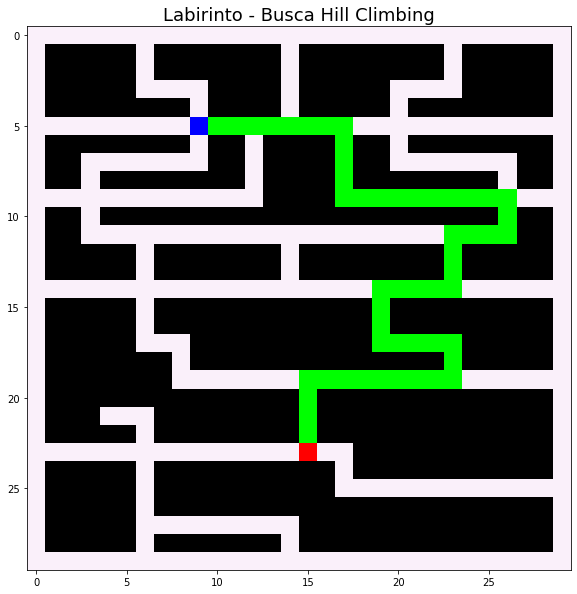

In [475]:
#Gerando imagem do labirinto com o caminho
img_HC = np.copy(img_maze)
for v in HC_path:
    img_HC[v[0]][v[1]] = [0,255,0]

img_HC[ini_position[0]][ini_position[1]] = [0,0,255]
img_HC[fin_position[0]][fin_position[1]] = [255,0,0]
    
f1, ax1 = plt.subplots(figsize=(20, 10))
ax1.imshow(img_HC)
ax1.set_title('Labirinto - Busca Hill Climbing', fontsize=18)
#ax1.axis('off')